# Importando base de dados

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
dados = pd.read_csv('tips.csv')

In [3]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução



In [4]:
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip' : 'gorjeta', 
    'dessert' : 'sobremesa', 
    'day' : 'dia_da_semana', 
    'time' : 'hora_do_dia', 
    'size' : 'total_de_pessoas'
}

In [5]:
gorjetas = dados.rename(columns = renomear)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [6]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [7]:
sim_nao = {
    'No' : 'Não', 
    'Yes': 'Sim'
}

In [8]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [9]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [10]:
dias_semanas = {
    'Sun' : 'Domingo', 
    'Sat' : 'Sábado', 
    'Thur' : 'Quinta', 
    'Fri' : 'Sexta'
}



In [11]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias_semanas)

In [12]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Dinner,3
240,27.18,2.00,Sim,Sábado,Dinner,2
241,22.67,2.00,Sim,Sábado,Dinner,2
242,17.82,1.75,Não,Sábado,Dinner,2


In [13]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [14]:
hora = {
    'Dinner' : 'Jantar', 
    'Lunch' : 'Almoço'
}

In [15]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [16]:
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Análise 1 - Valor da conta e gorjeta

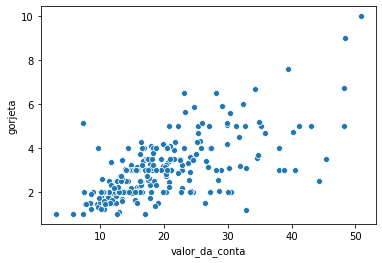

In [17]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data=gorjetas)

#### Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta

In [18]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [19]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [20]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [21]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [22]:
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


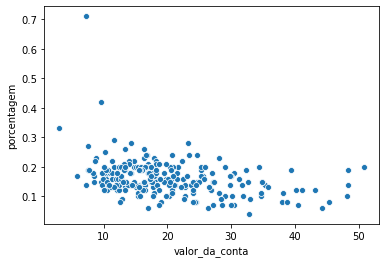

In [23]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

#### Visualmente, o valor da conta não é proporcional ao valor da gorjeta

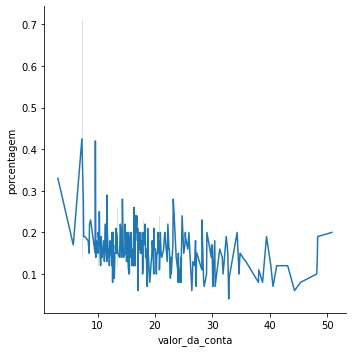

In [24]:
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem',kind='line', data=gorjetas)

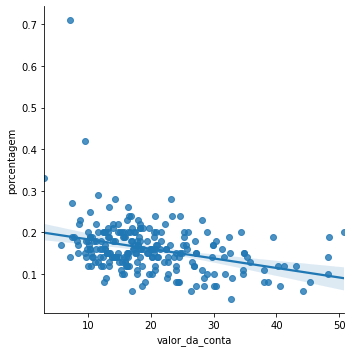

In [25]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

# Análise 2 - Sobremesa

In [26]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [27]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


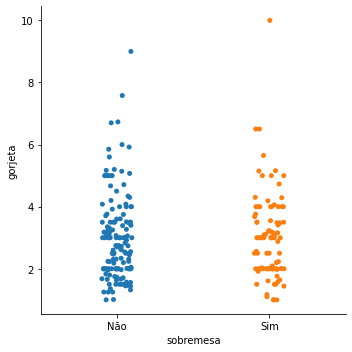

In [28]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

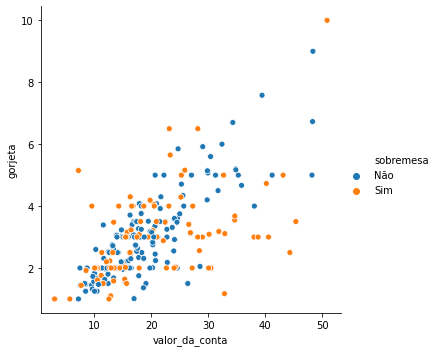

In [29]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue = 'sobremesa', data=gorjetas)

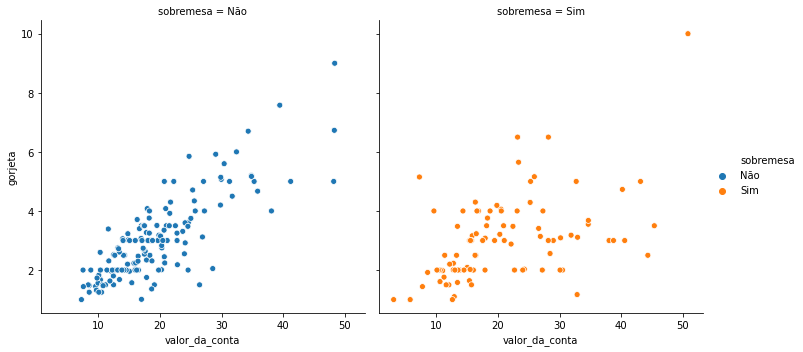

In [30]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue = 'sobremesa',col='sobremesa', data=gorjetas)

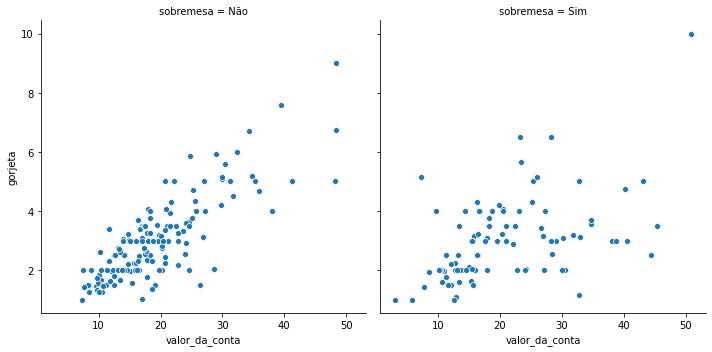

In [31]:
sns.relplot(x='valor_da_conta', y='gorjeta',col='sobremesa', data=gorjetas)

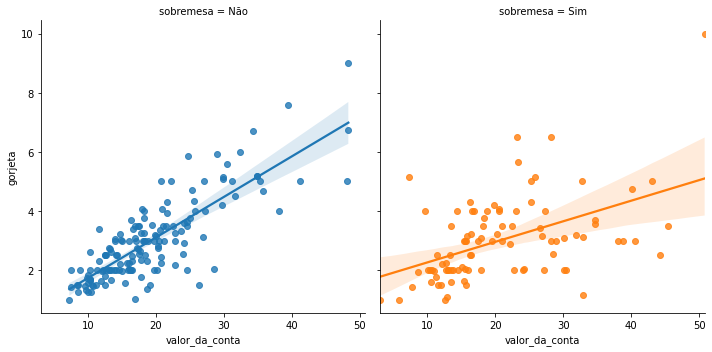

In [32]:
sns.lmplot(x='valor_da_conta', y='gorjeta',col='sobremesa',hue='sobremesa', data=gorjetas)

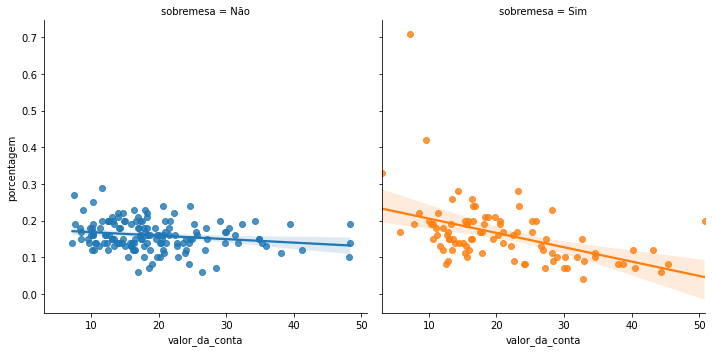

In [33]:
sns.lmplot(x='valor_da_conta', y='porcentagem',col='sobremesa',hue='sobremesa', data=gorjetas)

#### Visualmente existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e os que não pediram

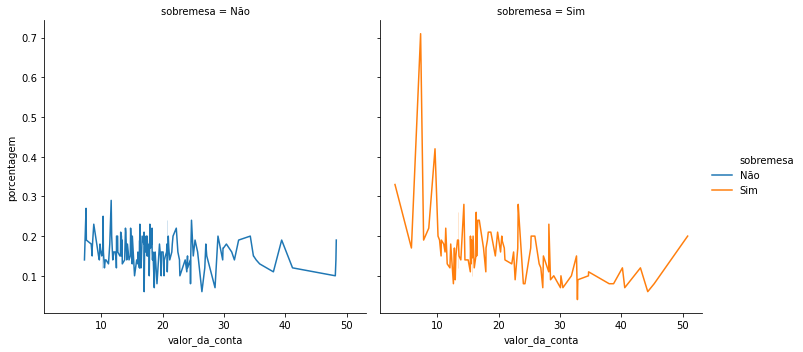

In [34]:
sns.relplot(x='valor_da_conta', y='porcentagem',col='sobremesa', hue='sobremesa', kind='line' , data=gorjetas)

## Teste de hipótese

**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alta</sup>**

>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [35]:
from scipy.stats import ranksums

In [36]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [37]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [38]:
r = ranksums(sobremesa, sem_sobremesa)

In [39]:
print('O valor do p-value é {}'.format(r.pvalue.round(2)))

O valor do p-value é 0.53


# Análise 3 - Dia da semana

In [40]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

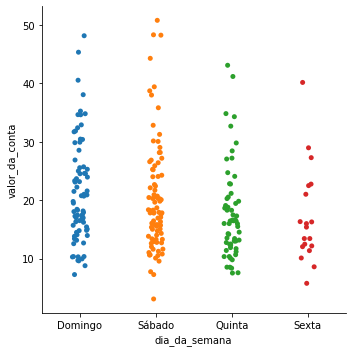

In [41]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

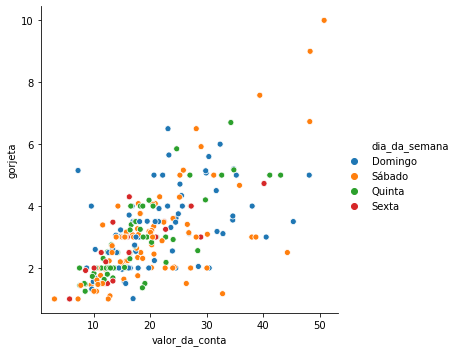

In [42]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

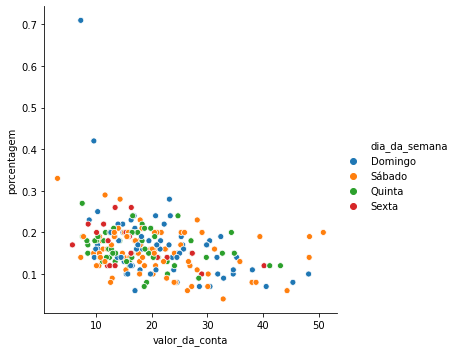

In [43]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

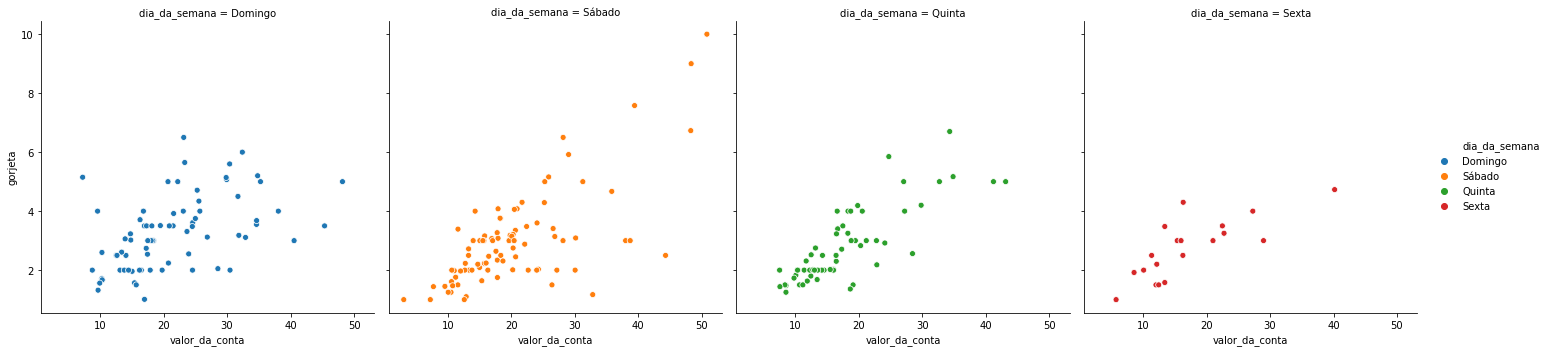

In [44]:
sns.relplot(x='valor_da_conta', y='gorjeta',col='dia_da_semana' ,hue='dia_da_semana',data=gorjetas)

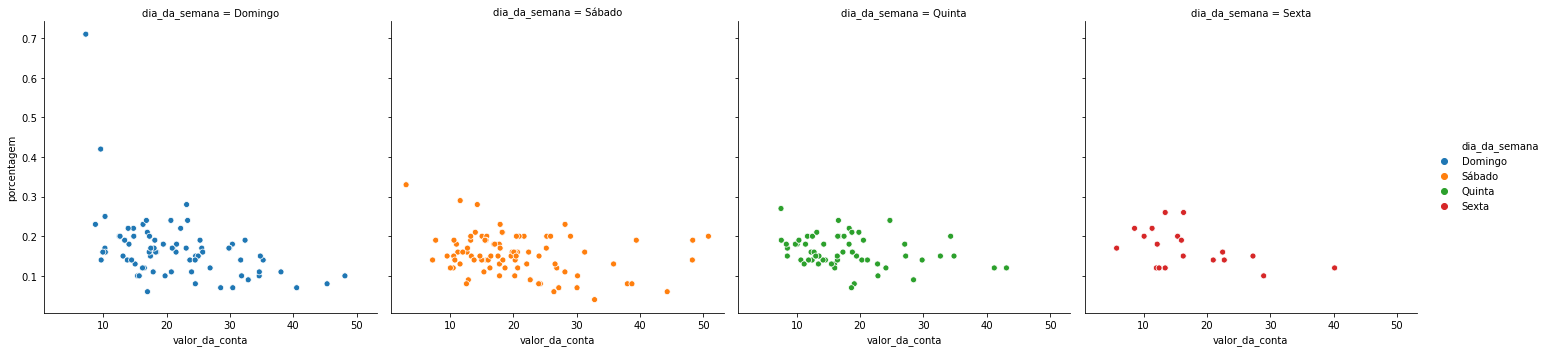

In [45]:
sns.relplot(x='valor_da_conta', y='porcentagem',col='dia_da_semana' ,hue='dia_da_semana',data=gorjetas)

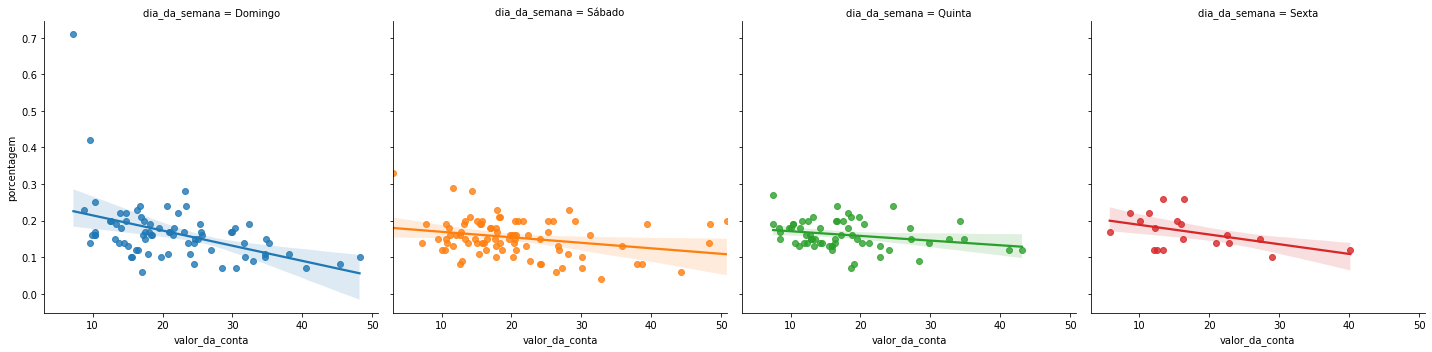

In [46]:
sns.lmplot(x='valor_da_conta', y='porcentagem',col='dia_da_semana' ,hue='dia_da_semana',data=gorjetas)

In [47]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [48]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.9982786885245902


In [49]:
gorjetas.groupby(['dia_da_semana']).mean().round(2)[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.41,3.26,0.17
Quinta,17.68,2.77,0.16
Sexta,17.15,2.73,0.17
Sábado,20.44,2.99,0.15


In [50]:
print('Frequencia dos dias')
gorjetas.dia_da_semana.value_counts()

Frequencia dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no sabado e no domingo**

**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no sabado e no domingo**

In [51]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [52]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [53]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)

In [54]:
print('O valor do p-value é {}'.format(r2.pvalue.round(2)))

O valor do p-value é 0.36


**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no sabado e no domingo**

# Análise 4 - Horário do dia

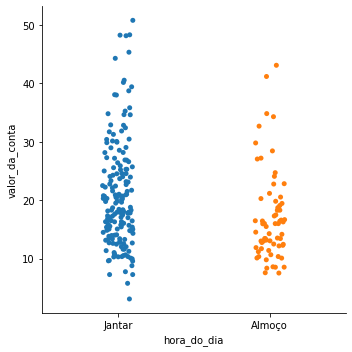

In [55]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

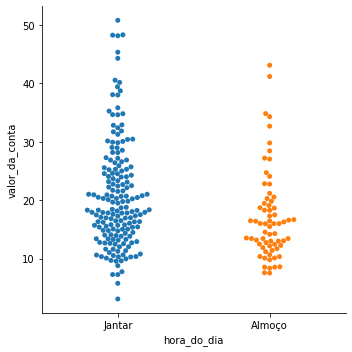

In [56]:
sns.catplot(x='hora_do_dia', y='valor_da_conta',kind='swarm' ,data=gorjetas)

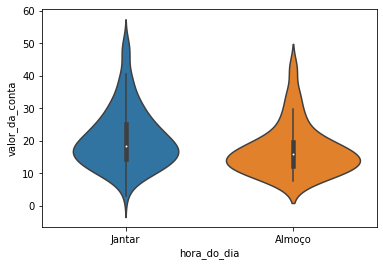

In [59]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta',data=gorjetas)

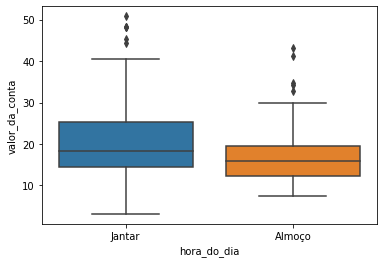

In [60]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta',data=gorjetas)

In [67]:
almoço = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

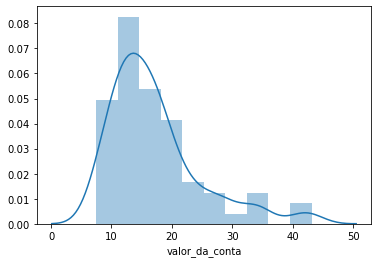

In [68]:
sns.distplot(almoço)

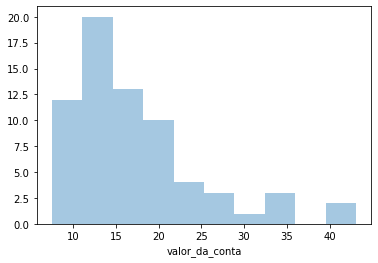

In [69]:
sns.distplot(almoço, kde=False)

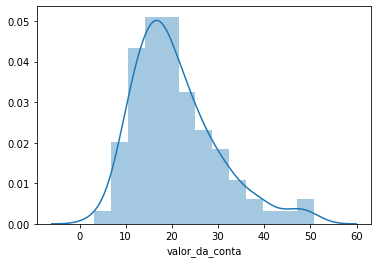

In [70]:
sns.distplot(jantar)

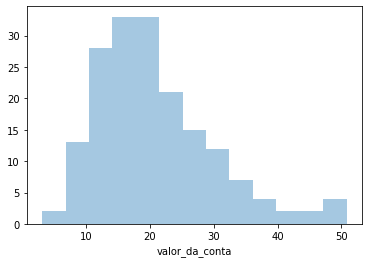

In [71]:
sns.distplot(jantar, kde=False)

In [74]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']].round(2)

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.17,2.73,0.16
Jantar,20.80,3.10,0.16


## Teste de hipótese

**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no jantar e no almoço**

In [76]:
r3 = ranksums(jantar, almoço)

In [79]:
print('O valor do p-value é {}'.format(r3.pvalue.round(4)))

O valor do p-value é 0.0012


**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no jantar e no almoço**

**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no jantar e no almoço**

In [82]:
porcentagem_almoço = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [85]:
r4 = ranksums(porcentagem_almoço, porcentagem_jantar)

In [86]:
print('O valor do p-value é {}'.format(r4.pvalue.round(4)))

O valor do p-value é 0.2602


**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no jantar e no almoço**